<a href="https://colab.research.google.com/github/Deepakvk18/machine-learning-models/blob/main/nasa_nearest_earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('nasa-nearest-earth-objects')
jovian.set_colab_id('1tdMlu9yi9sWXOU3KXM4mKHDNeK43Rg_P')

#NASA Nearest Earth Objects


The Objective of this model is to predict whether the particular asteroid is hazardous to Earth or not based on a certain parameters that are available in the dataset. This dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.


# nasa-nearest-earth-objects

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="nasa-nearest-earth-objects")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects


'https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects'

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

#Importing the dataset with pandas

In [ ]:
url = 'https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects'
od.download('https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepakvk18
Your Kaggle Key: ··········


100%|██████████| 6.60M/6.60M [00:00<00:00, 75.5MB/s]

In [ ]:
neo_df = pd.read_csv('/content/nasa-nearest-earth-objects/neo.csv')
neo_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
neo_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [ ]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Since there are no NaN values, there is no need for preprocessing the data or cleaning the data. 

Let us understand some terminologies of the data before trying to predict the hazardousness of the near earth object.

**est_min_diameter & est_max_diameter** is the minimum and maximum diameter of the space object. Since the space objects are not circular in shape, we cannot describe teir size with radius. That is why maximum and minimum size of the space objects are provided so that one can get the idea of how big the object is.

**relative_velocity** is the velocity of the object in relative to the motion of the earth.

**miss_distance** is the distance in kilometers the object has missed the earth

**absolute_magnitude** is the the magnitude (brightness) of a celestial object as it would be seen at a standard distance of 10 parsecs. In other words, it is the intrinsic luminosity of the object

#EDA and Data Visualization of the data

###Univariate Analysis

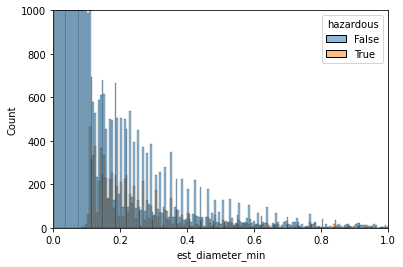

In [ ]:
plt.xlim(0,1)
plt.ylim(0,1000)
sns.histplot(data = neo_df, x= 'est_diameter_min', hue = 'hazardous');

The above histogram shows that the min diameter of the objects follow exponential distribution. The lesser the diameter is, the more number of objects are present.

The histogram clearly reveals that the object can be only dangerous if the minimum diameter of it is atleast 0.1 kilometres.

Here is where we can assume that the near earth objects with minimum diameter of less than 0.1 kilometers are not much danger to earth.

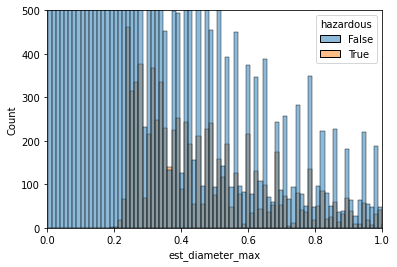

In [ ]:
plt.xlim(0,1)
plt.ylim(0,500)
sns.histplot(data = neo_df, x= 'est_diameter_max', hue = 'hazardous');

The above histogram shows that the max diameter of the objects follow exponential distribution. The lesser the diameter is, the more number of objects are present.

The histogram clearly reveals that the object can be only dangerous if the maximum diameter of it is atleast 0.2 kilometres.

Here is where we can assume that the near earth objects with maximum diameter of less than 0.2 kilometers are not much danger to earth.

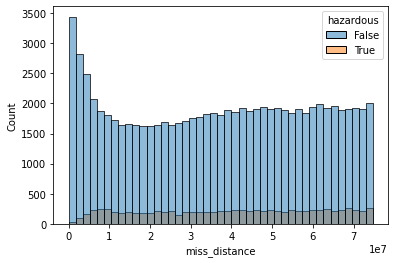

In [ ]:
sns.histplot(data = neo_df, x= 'miss_distance', hue = 'hazardous');

As seen from the above histogram, miss distance is following a uniform distribution and do not give much information about whether the object is hazardous or not based on midd distance.

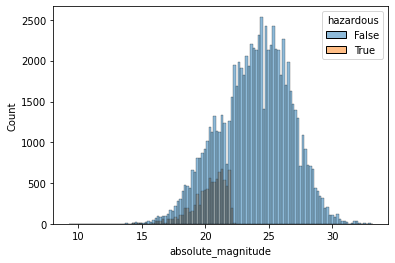

In [ ]:
sns.histplot(data = neo_df, x= 'absolute_magnitude', hue = 'hazardous');

As seen from the above histogram, objects with absolute magnitude between 15 and 22 has more probability of being hazardous to earth when compared to other objects and absolute magnitude follows a normal distribution.

###Bivariate Analysis

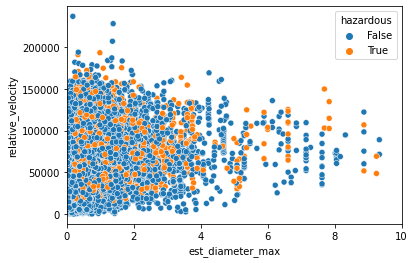

In [ ]:
plt.xlim(0,10)
sns.scatterplot(data = neo_df, x='est_diameter_max', y = 'relative_velocity', hue = 'hazardous');

This scatterplot do not reveal much info about the object being harardous or not.

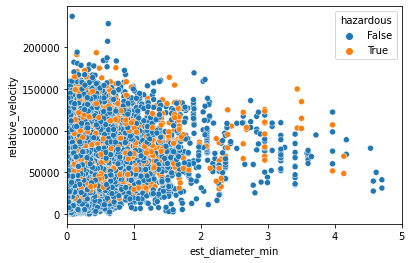

In [ ]:
plt.xlim(0,5)
sns.scatterplot(data = neo_df, x='est_diameter_min', y = 'relative_velocity', hue = 'hazardous');

This scatterplot do not reveal much info about the object being harardous or not.

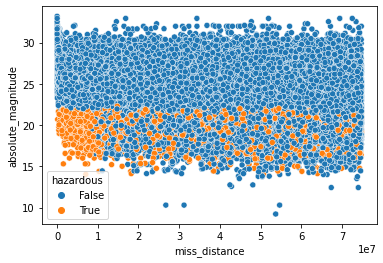

In [ ]:
sns.scatterplot(data = neo_df, x='miss_distance', y = 'absolute_magnitude', hue = 'hazardous');

According to the above scatterplot, the object with absolute magnitude is less than 22 and miss distance is less than 1e7, has more chance of being hazardous when compared to any other object.

Since there is a lot of data and scatterplot does'nt seem to reveal much, let's just plot pairplot and select specific graphs which seems to have some kind of pattern in it.

In [ ]:
pair_df = neo_df[['est_diameter_min','est_diameter_max','relative_velocity', 'miss_distance', 'absolute_magnitude','hazardous']]

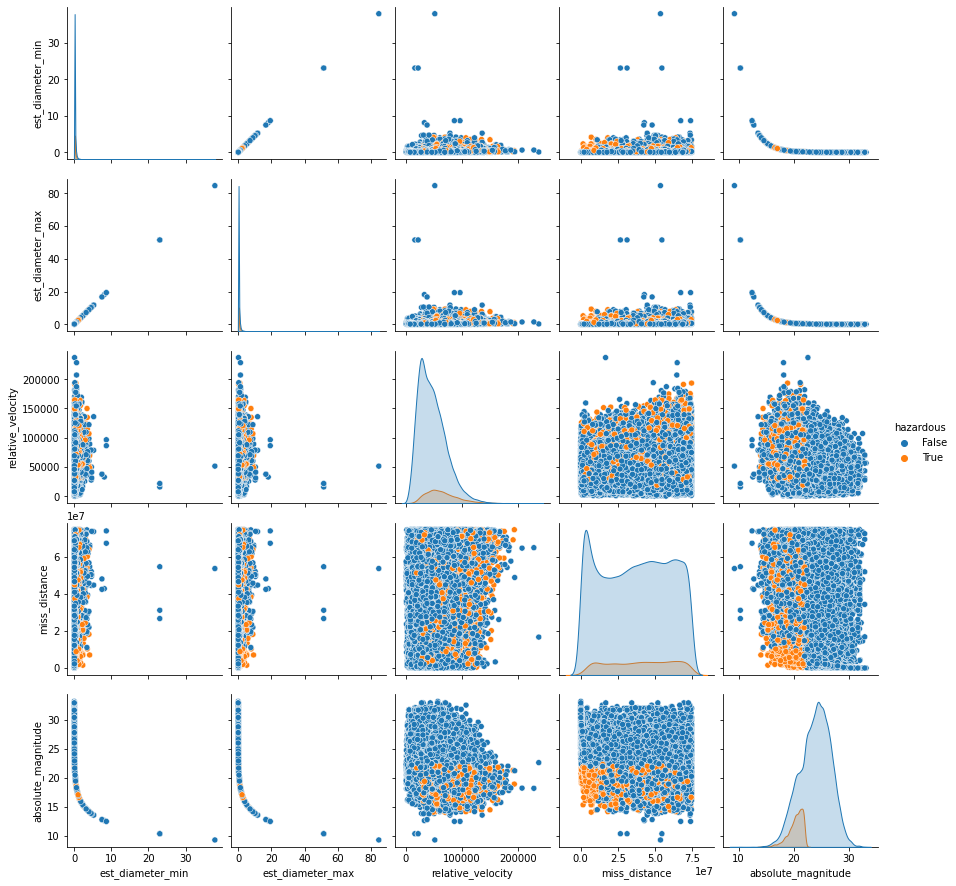

In [ ]:
sns.pairplot(data = pair_df, hue = 'hazardous')

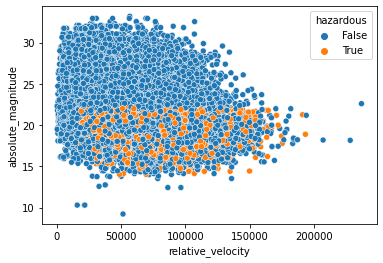

In [ ]:
sns.scatterplot(data = neo_df, x='relative_velocity', y = 'absolute_magnitude', hue = 'hazardous');

These scatterplots do not reveal much info as there is just too much of data. 

#Splitting the dataset

In [ ]:
neo_df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [ ]:
input_cols = ['est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance',
       'absolute_magnitude']
target_col = 'hazardous'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(neo_df[input_cols], neo_df[target_col], test_size = 0.2)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((72668, 5), (72668,), (18168, 5), (18168,))

#Building the models

Since this is a classfication problem, we can use Logistic Regression, K-Nearest Neighbours, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier. 

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_preds, Y_train)
test_accuracy = accuracy_score(test_preds, Y_test)
train_accuracy, test_accuracy

(1.0, 0.9139696169088507)

In [ ]:
confusion_matrix(test_preds, Y_test)

array([[15858,  1080],
       [  483,   747]])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model1 = XGBClassifier(random_state = 42)
model1.fit(X_train, Y_train)

XGBClassifier(random_state=42)

In [ ]:
train_preds1 = model1.predict(X_train)
test_preds1 = model1.predict(X_test)

In [ ]:
train_accuracy1 = accuracy_score(train_preds1, Y_train)
test_accuracy1 = accuracy_score(test_preds1, Y_test)
train_accuracy1, test_accuracy1

(0.913854791655199, 0.9101717305151915)

In [ ]:
confusion_matrix(test_preds1, Y_test)

array([[16276,  1567],
       [   65,   260]])

In [ ]:
precision_recall_fscore_support(test_preds1, Y_test)

(array([0.99602228, 0.1423098 ]),
 array([0.91217845, 0.8       ]),
 array([0.95225837, 0.24163569]),
 array([17843,   325]))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects


'https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects'

#Tuning the HyperParameters

Eventhough I got 91% accuracy in the first model, the precision and recall scores are not that much great as I am able to predict false values well when compared to the true values and so, my model is not able to predict the true hazardous objects well which is the objective of this model. The same is the case with my second model. This can be overcome by tuning the hyperparameters of the model.

Let me just create a function which I can reuse to fit the train accuracy and test accuracy at the least distance possible. 

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, Y_train)
    train_accuracy = accuracy_score(model.predict(X_train), Y_train)
    test_accuracy = accuracy_score(model.predict(X_test), Y_test)
    return train_accuracy, test_accuracy, confusion_matrix(model.predict(X_test), Y_test)

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_accuracies, test_accuracies, confusion_matrices = [], [], []
    for value in param_values:
        params = {param_name: value}
        train_accuracy, test_accuracy, confusion_matrix = test_params(**params)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        confusion_matrices.append(confusion_matrix)
    print(confusion_matrices)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accuracies, 'b-o')
    plt.plot(param_values, test_accuracies, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracies')
    plt.legend(['Training', 'Validation'])

[array([[16341,  1827],
       [    0,     0]]), array([[16300,  1604],
       [   41,   223]]), array([[16293,  1595],
       [   48,   232]]), array([[16277,  1533],
       [   64,   294]]), array([[16214,  1434],
       [  127,   393]])]


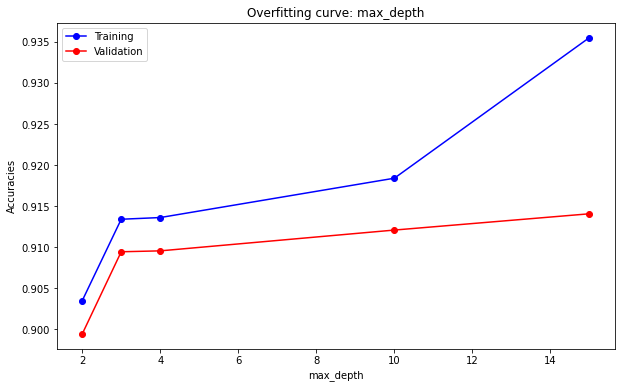

In [ ]:
test_param_and_plot('max_depth', [2,3,4,10,15])

After maximum depth of 10, the training and validation accuracies diverge which means the model memorized the test data and so the accuracy in the real world data set would be terrible. So, for now, the optimum max_depth is 10.

[array([[16288,  1594],
       [   53,   233]]), array([[16284,  1586],
       [   57,   241]]), array([[16270,  1553],
       [   71,   274]]), array([[16254,  1515],
       [   87,   312]]), array([[16246,  1475],
       [   95,   352]]), array([[16202,  1412],
       [  139,   415]])]


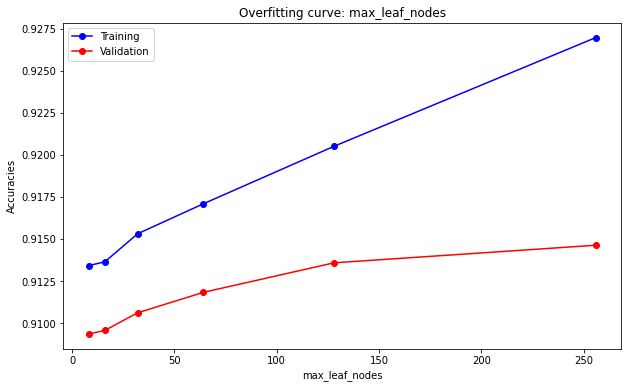

In [ ]:
test_param_and_plot('max_leaf_nodes', [8,16,32,64,128,256])

If the max_leaf_nodes is increased after 128, the model memorizes the data. Thus, it is preferred to keep the max_leaf_nodes to 128

Let me just combine both max_depth = 10 and max_leaf_nodes = 128 and build a model.

In [ ]:
test_params(max_depth = 10, max_leaf_nodes = 128)

(0.9173914240105686, 0.9115477763099956, array([[16274,  1540],
        [   67,   287]]))

This seems to be the most optimum model for predicting hazardous near earth objects. 

In [ ]:
random_forest = RandomForestClassifier(n_jobs = -1,random_state = 42,max_depth = 10, max_leaf_nodes = 128)

In [ ]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=128, n_jobs=-1,
                       random_state=42)

In [ ]:
confusion = confusion_matrix(random_forest.predict(X_test), Y_test)

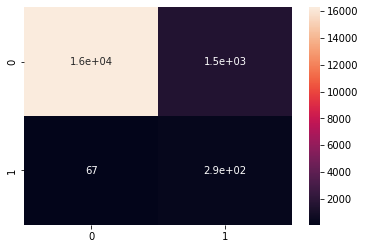

In [ ]:
sns.heatmap(confusion, annot = True)

This heatmap can be summarizes as:


1.  TruePositives = 290
2.  FalsePositives = 67
3.  FalseNegatives = 1500
4.  TrueNegatives  = 16000

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects


'https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects'

#Predicting Sample Data and Visualizing the model

In [ ]:
input_cols

['est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude']

In [ ]:
sample_data = pd.DataFrame([[0.01,0.5,159604,57430394,55],
                [5,8,2749585,193847,18],
                [10,19,457686,30444,16],
                [1500,2000,736484,85794421,28]], columns = input_cols)

In [ ]:
random_forest.predict(sample_data)

array([False,  True,  True, False])

According to my model's prediction, the first and fourth object is not hazardous and second & thirs object are hazardous to Earth

In [ ]:
from sklearn.tree import plot_tree

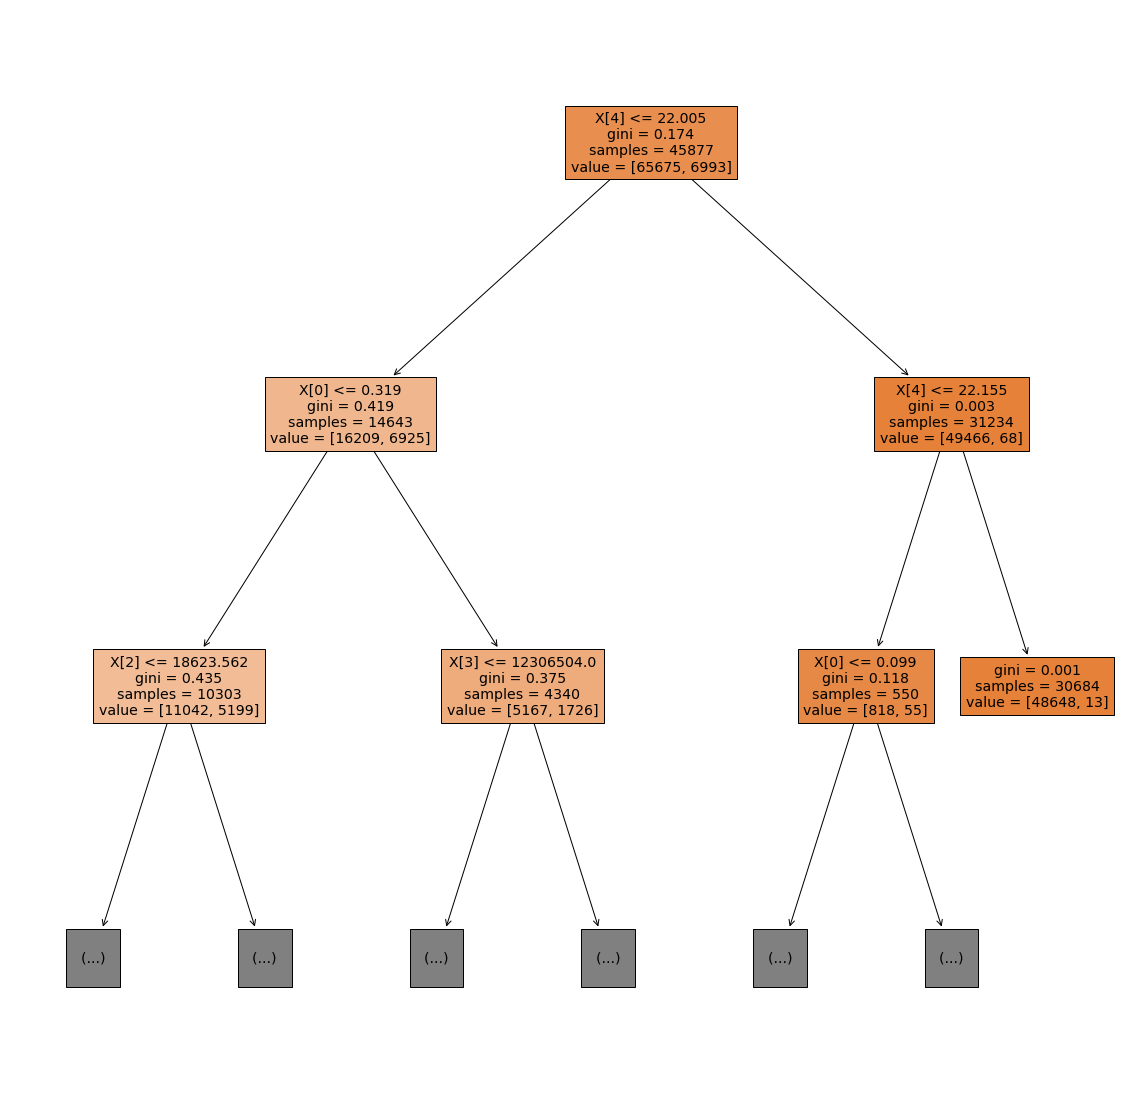

In [ ]:
plt.figure(figsize = (20,20))
plot_tree(random_forest[-1], max_depth = 2, filled = True);

This is my final model that is obtained after going through a series of decision trees. 

#Saving the model

In [ ]:
import joblib

In [ ]:
neo_model = {
    'RFgeneric':model,
    'XGBoost':model1,
    'RFFinal':random_forest,
    'input_cols':input_cols,
    'target_col':target_col
}

In [ ]:
joblib.dump(neo_model, 'neo-models.joblib')

['neo-models.joblib']

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects


'https://jovian.ai/deepakvinayagam1199/nasa-nearest-earth-objects'